# Lending Club Case Study

**Problem Statement:**
The primary objective of this exercise is to assist Lending Club in mitigating credit losses. This challenge arises from two potential scenarios:
1. Identifying applicants likely to repay their loans is crucial, as they can generate profits for the company through interest payments. Rejecting such applicants would result in a loss of potential business.
2. On the other hand, approving loans for applicants not likely to repay and at risk of default can lead to substantial financial losses for the company.

### Importing Libraries

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns

In [2]:
#read the dataset and check the first five rows
loan = pd.read_csv("loan.csv")
loan.head()

/var/folders/f2/__lf7f8j44zczml0p0z9xnwm0000gn/T/ipykernel_3270/3612398274.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan.shape

(39717, 111)

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loan.isna().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

###### There are a lot of empty columns in the loan dataset. Dropping those columns from the dataset and then checking the dataset shape

In [6]:
null_cols_dropped = 0
for col in sorted(loan.columns):
    if loan[col].isna().sum() == loan.shape[0]:
        null_cols_dropped = null_cols_dropped + 1
        
print(f'Percentage of dropped columns = {round(null_cols_dropped / loan.shape[1] * 100, 2)}%')

Percentage of dropped columns = 48.65%


In [7]:
loan.dropna(axis = 1, how = 'all', inplace = True)
loan.shape

(39717, 57)

In [8]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### Dropping records where loan_status = 'Current'

In [9]:
loan = loan[loan['loan_status'].str.lower() != "current"]
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [10]:
loan[loan.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [11]:
remove_columns_unique_list = []
for i in loan.columns:
    # Check if unique value count is 1
    if loan[i].nunique() == 1:
        remove_columns_unique_list.append(i)
    

# Remove those columns
loan.drop(remove_columns_unique_list, axis = 1, inplace = True)

In [12]:
loan.shape

(38577, 46)

In [13]:
for col in loan.columns:
    missing_values = round(loan[col].isna().sum() / loan.shape[0], 2)
    if missing_values >= 0.65:
        loan.drop(col, axis = 1, inplace = True)
        
loan.shape

(38577, 43)

In [14]:
# List the columns which are not required for the analysis. Total 27 columns
drop_cols = [
 'collection_recovery_fee',
 'delinq_2yrs',
 'desc',
 'earliest_cr_line',
 'emp_title',
 'id',
 'inq_last_6mths',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'member_id',
 'open_acc',
 'pub_rec',
 'recoveries',
 'revol_bal',
 'revol_util',
 'title',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'url',
 'zip_code',
]

loan.drop(drop_cols, axis = 1, inplace = True)

In [15]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state            38

In [16]:
loan.shape

(38577, 18)

In [17]:
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### Checking for missing values

In [18]:
(loan.isna().sum()/len(loan.index))*100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [19]:
print("Mode : " + loan.emp_length.mode()[0])
loan.emp_length.value_counts()

Mode : 10+ years


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [20]:
loan.emp_length.fillna(loan.emp_length.mode()[0],inplace=True)
loan.emp_length.isna().sum()

0

In [21]:
loan.int_rate = pd.to_numeric(loan.int_rate.apply(lambda x : x.split('%')[0]))

In [22]:
loan.emp_length = pd.to_numeric(loan.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [23]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


<Axes: >

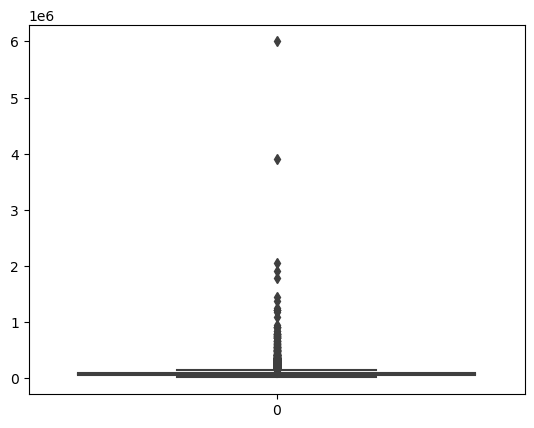

In [24]:
sns.boxplot(loan['annual_inc'])

### removing outliers
- Let's see the quantile info and take an appropriate action.
- The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
- So, considering threshold for removing outliers as 0.95

In [25]:
quantile_info = loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [26]:
per_95_annual_inc = loan['annual_inc'].quantile(0.95)
loan = loan[loan.annual_inc <= per_95_annual_inc]

<Axes: >

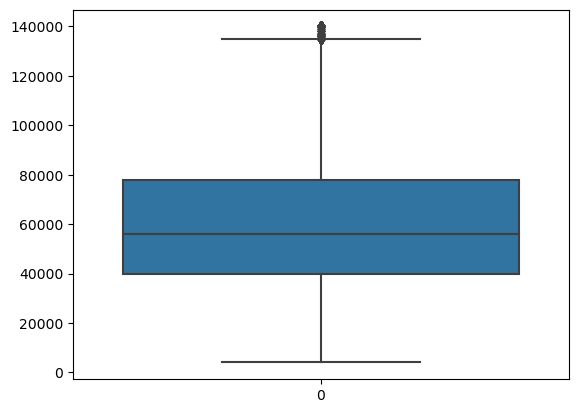

In [27]:
sns.boxplot(loan.annual_inc)

annual_income looks good, most of the people applied loan who has income between 40000 to 80000
Now lets go to the other columns

<Axes: >

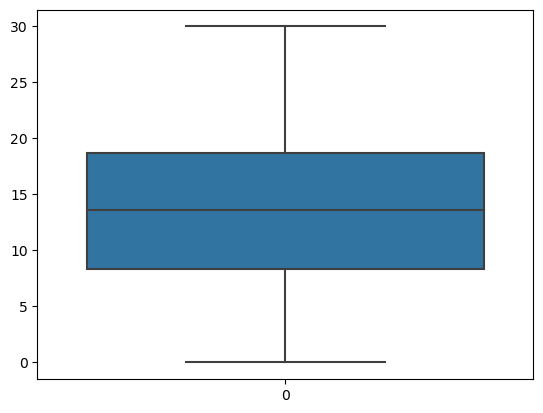

In [28]:
sns.boxplot(loan.dti)

<Axes: >

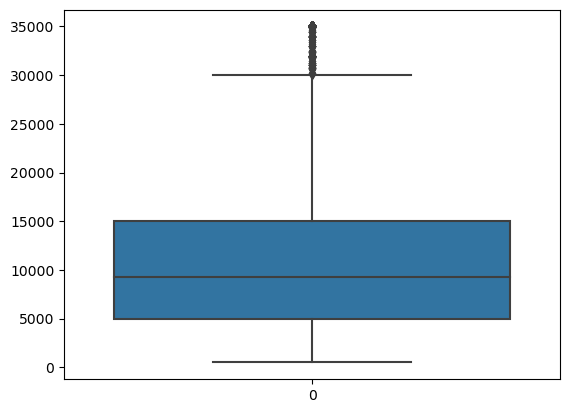

In [29]:
sns.boxplot(loan.loan_amnt)

In [30]:
loan.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<Axes: >

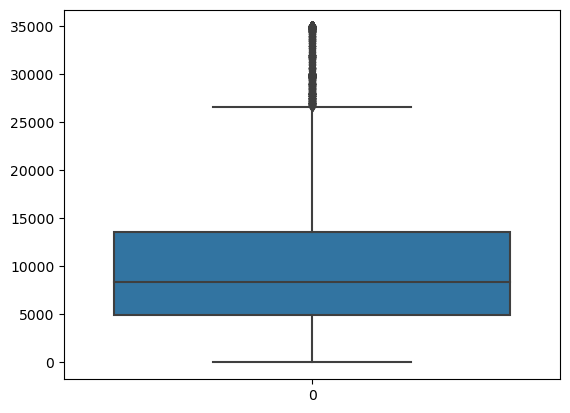

In [31]:
sns.boxplot(loan.funded_amnt_inv)

In [32]:
loan.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8375.000000
0.750    13623.731415
0.900    19750.000000
0.950    23941.875589
0.970    24975.000000
0.975    25350.000000
0.980    27950.000000
0.985    29925.000000
0.990    31954.028576
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

<Axes: xlabel='loan_status', ylabel='count'>

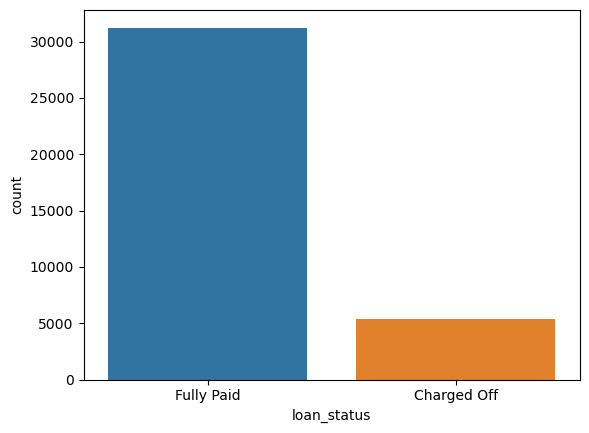

In [33]:
sns.countplot(x = 'loan_status', data = loan)

In [34]:
loan.sub_grade = pd.to_numeric(loan.sub_grade.apply(lambda x : x[-1]))


/var/folders/f2/__lf7f8j44zczml0p0z9xnwm0000gn/T/ipykernel_3270/2731568819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan.sub_grade = pd.to_numeric(loan.sub_grade.apply(lambda x : x[-1]))


In [35]:
loan.sub_grade.head(10)

0     2
1     4
2     5
3     1
5     4
6     5
7     1
8     2
9     5
10    3
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

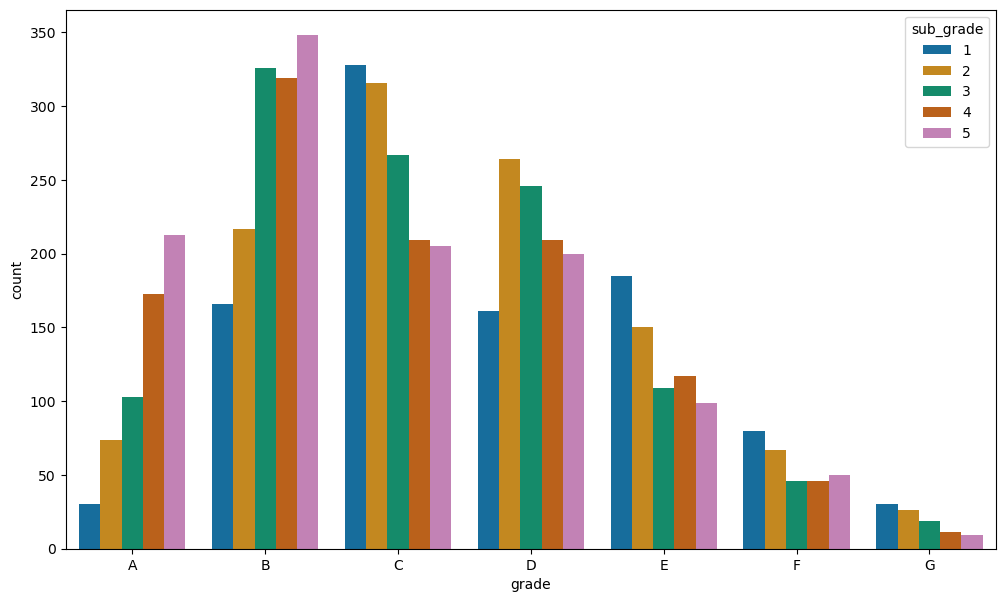

In [36]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan[loan.loan_status == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

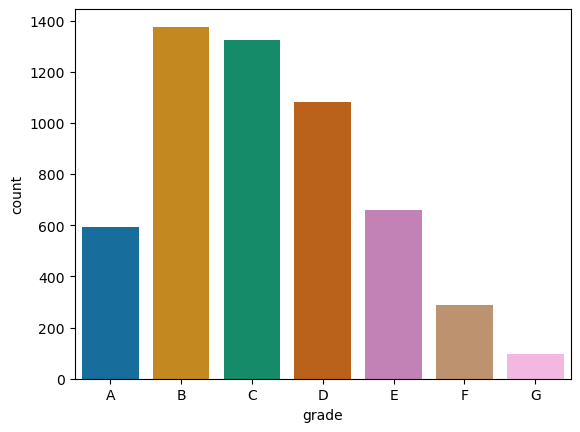

In [37]:
sns.countplot(x = 'grade', data = loan[loan.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

<Axes: xlabel='grade', ylabel='count'>

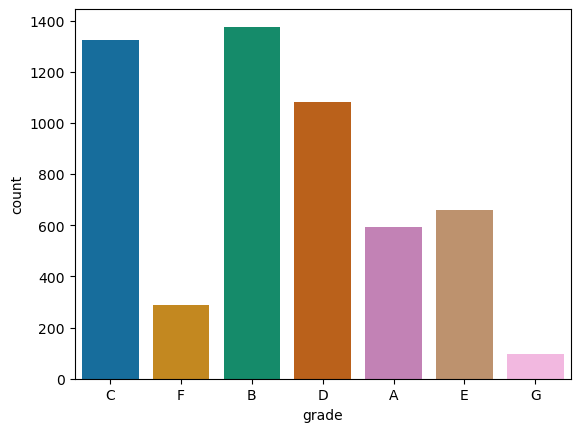

In [38]:
sns.countplot(x = 'grade', data = loan[loan.loan_status == 'Charged Off'])

In [39]:
#checking unique values for home_ownership
loan['home_ownership'].unique()


array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [40]:
#replacing 'NONE' with 'OTHERS'
loan['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

/var/folders/f2/__lf7f8j44zczml0p0z9xnwm0000gn/T/ipykernel_3270/302306964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)


In [41]:
#checking unique values for home_ownership again
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

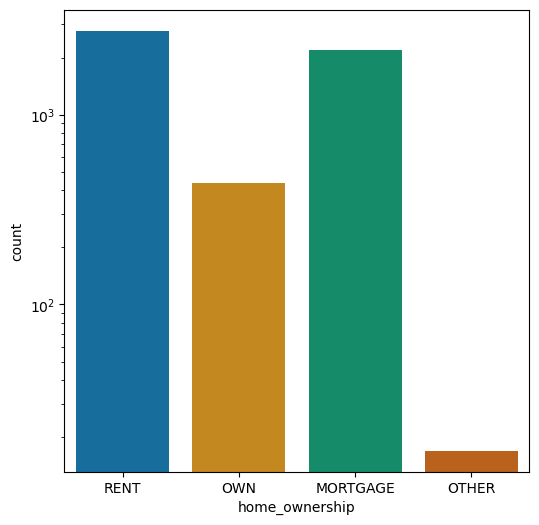

In [42]:
fig, ax = plt.subplots(figsize = (6,6))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan[loan['loan_status']=='Charged Off'])

<Axes: xlabel='count', ylabel='purpose'>

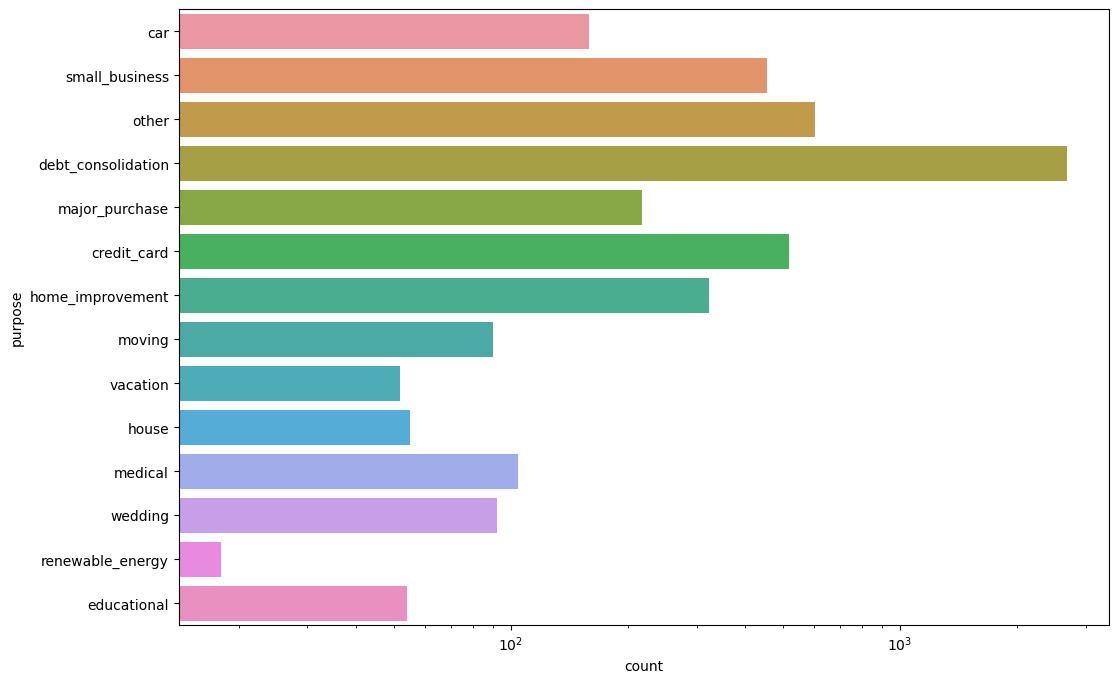

In [43]:
#Analysing Purpose
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan[loan.loan_status == 'Charged Off'])


#### Creating bins for some numerical variable to make them categorical

In [44]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan['int_rate_groups'] = pd.cut(loan['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan['annual_inc_groups'] = pd.cut(loan['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

/var/folders/f2/__lf7f8j44zczml0p0z9xnwm0000gn/T/ipykernel_3270/2477003387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['int_rate_groups'] = pd.cut(loan['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
/var/folders/f2/__lf7f8j44zczml0p0z9xnwm0000gn/T/ipykernel_3270/2477003387.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['annual_inc_groups'] = pd.cut(loan['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-

In [45]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,int_rate_groups,annual_inc_groups
0,5000,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0,9%-13%,3k-31k
1,2500,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0,13%-17%,3k-31k
2,2400,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0,13%-17%,3k-31k
3,10000,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0,13%-17%,31k-58k
5,5000,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0,5%-9%,31k-58k


/var/folders/f2/__lf7f8j44zczml0p0z9xnwm0000gn/T/ipykernel_3270/3587293396.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


<Axes: xlabel='emp_length', ylabel='count'>

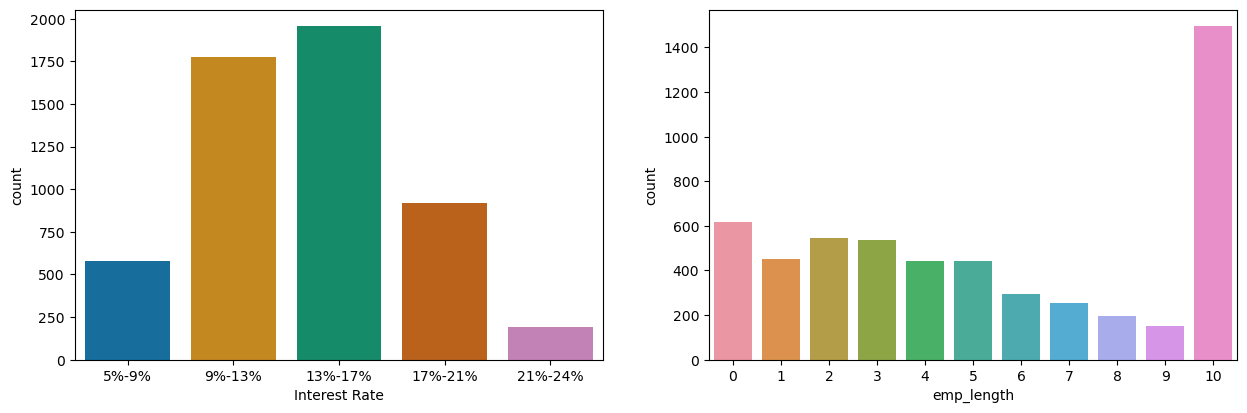

In [46]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan[loan.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan[loan.loan_status == 'Charged Off'])

<Axes: xlabel='annual_inc_groups', ylabel='count'>

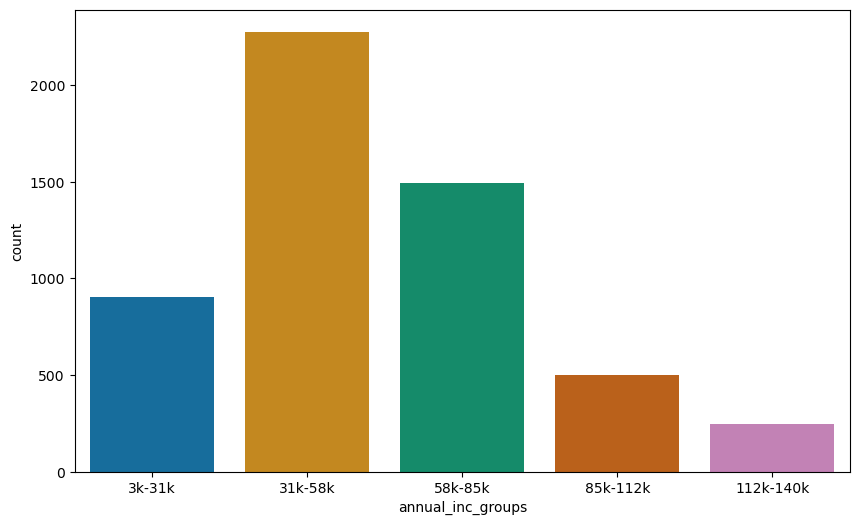

In [47]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=loan[loan.loan_status == 'Charged Off'])

<Axes: xlabel='count', ylabel='term'>

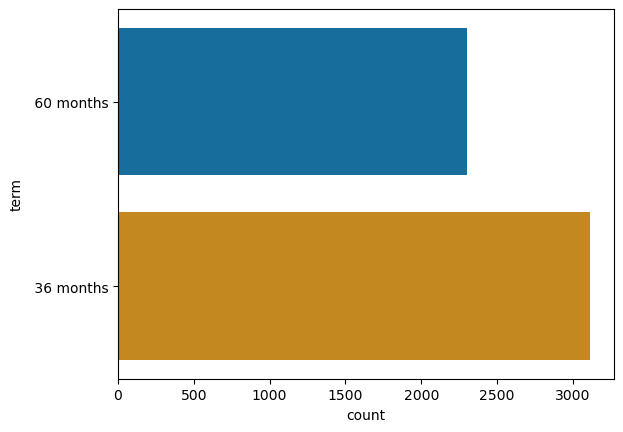

In [48]:
sns.countplot(y='term', data=loan[loan['loan_status']=='Charged Off'])

<Axes: xlabel='verification_status', ylabel='count'>

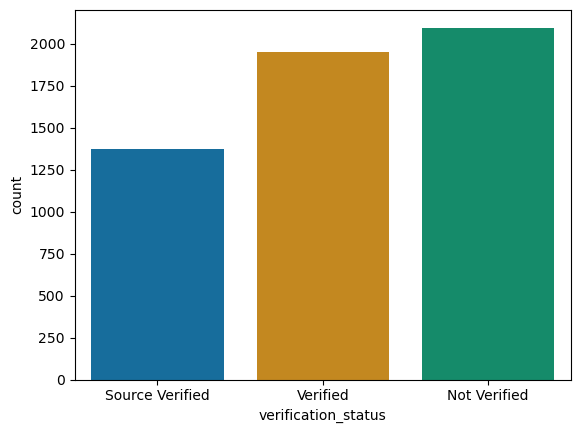

In [49]:
sns.countplot(x='verification_status', data=loan[loan['loan_status']=='Charged Off'])

In [50]:
## Extracting month and year
df_month_year = loan['issue_d'].str.partition("-", True)     
loan['issue_month']=df_month_year[0]                       
loan['issue_year']='20' + df_month_year[2]

/var/folders/f2/__lf7f8j44zczml0p0z9xnwm0000gn/T/ipykernel_3270/2526229623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['issue_month']=df_month_year[0]
/var/folders/f2/__lf7f8j44zczml0p0z9xnwm0000gn/T/ipykernel_3270/2526229623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['issue_year']='20' + df_month_year[2]


In [51]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,int_rate_groups,annual_inc_groups,issue_month,issue_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,...,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0,9%-13%,3k-31k,Dec,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,...,Dec-11,Charged Off,car,GA,1.00,0.0,13%-17%,3k-31k,Dec,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,...,Dec-11,Fully Paid,small_business,IL,8.72,0.0,13%-17%,3k-31k,Dec,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,...,Dec-11,Fully Paid,other,CA,20.00,0.0,13%-17%,31k-58k,Dec,2011
5,5000,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,...,Dec-11,Fully Paid,wedding,AZ,11.20,0.0,5%-9%,31k-58k,Dec,2011


<Axes: xlabel='issue_year', ylabel='count'>

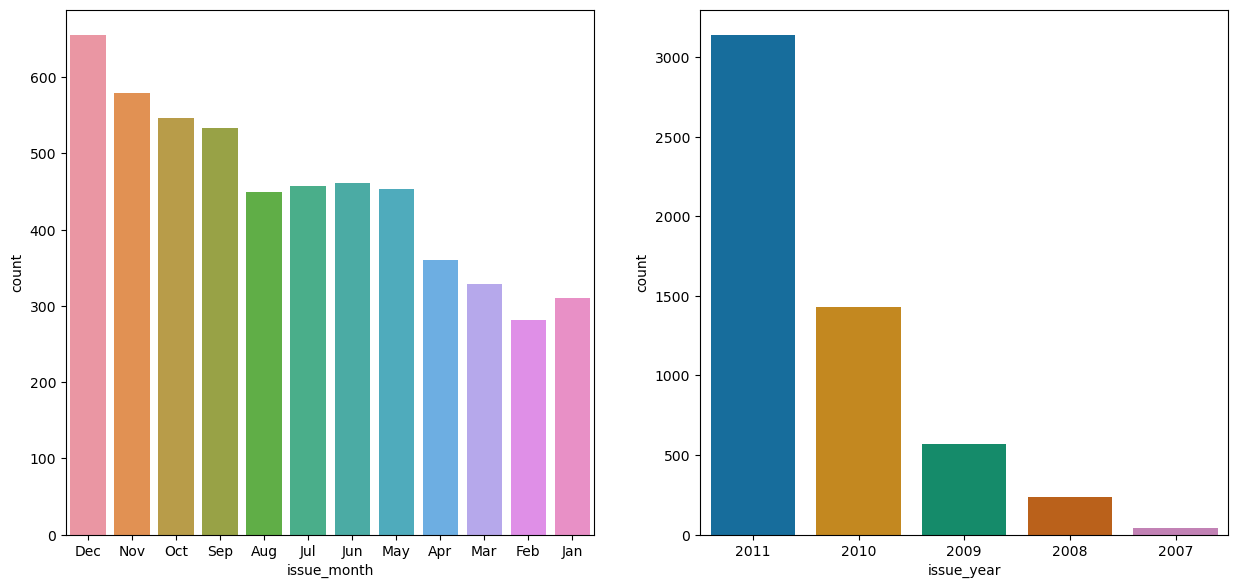

In [52]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan[loan['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan[loan['loan_status']=='Charged Off'])

In [53]:
loan['installment_groups'] = pd.cut(loan['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan['funded_amnt_inv_group'] = pd.cut(loan['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan['loan_amnt_groups'] = pd.cut(loan['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan['dti_groups'] = pd.cut(loan['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

/var/folders/f2/__lf7f8j44zczml0p0z9xnwm0000gn/T/ipykernel_3270/749990433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['installment_groups'] = pd.cut(loan['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
/var/folders/f2/__lf7f8j44zczml0p0z9xnwm0000gn/T/ipykernel_3270/749990433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['funded_amnt_inv_group'] = pd.cut(loan['funded_amnt_inv'], bins

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

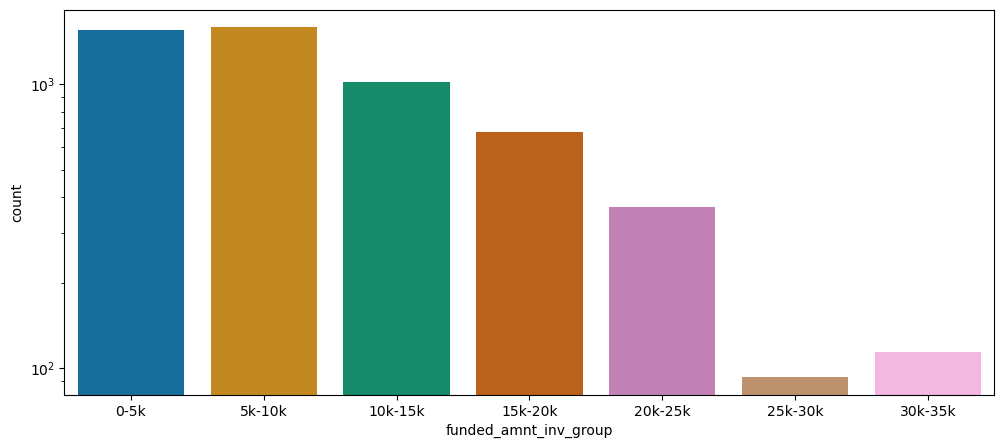

In [54]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=loan[loan['loan_status']=='Charged Off'])

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

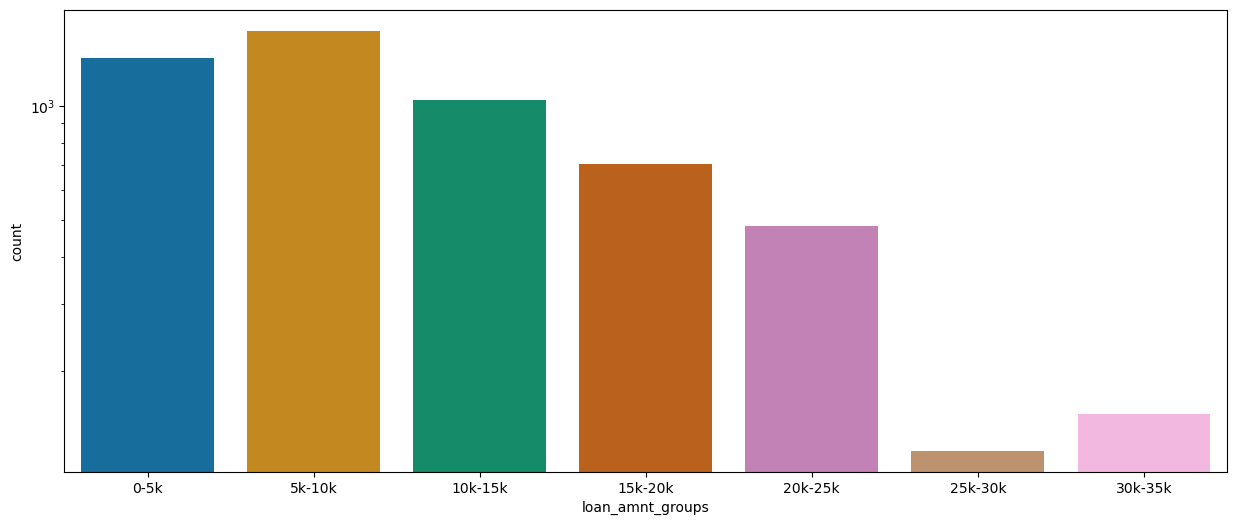

In [55]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan[loan['loan_status']=='Charged Off'])

<Axes: xlabel='dti_groups', ylabel='count'>

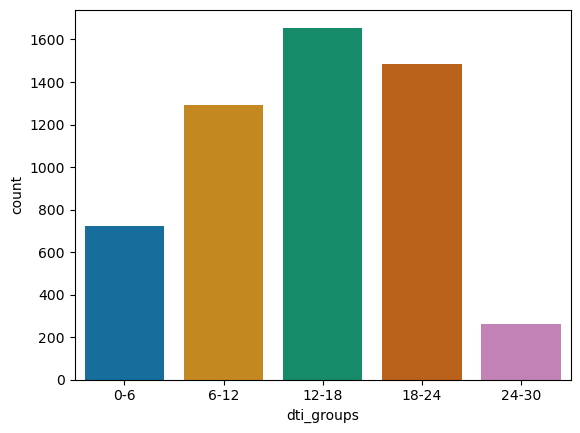

In [56]:
sns.countplot(x='dti_groups', data=loan[loan['loan_status']=='Charged Off'])

<Axes: xlabel='installment_groups', ylabel='count'>

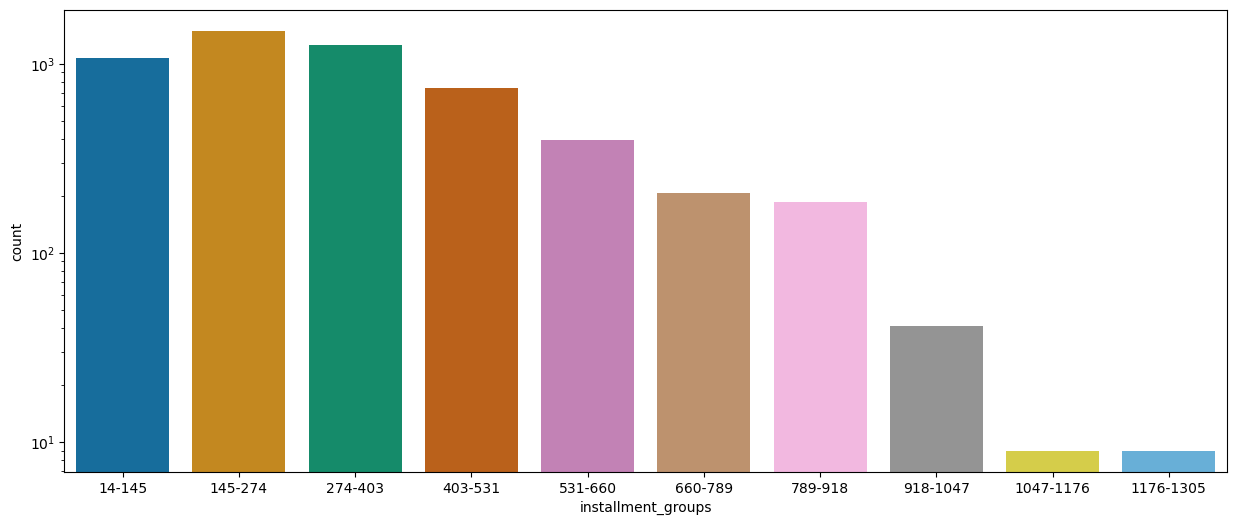

In [57]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan[loan['loan_status']=='Charged Off'])

# Observations

### The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when : 

- Applicants having house_ownership as 'RENT'
- Applicants who use the loan to clear other debts
- Applicants who receive interest at the rate of 13-17%
- Applicants who have an income of range 31201 - 58402
- Applicants who have 20-37 open_acc
- Applicants with employement length of 10
- When funded amount by investor is between 5000-10000
- Loan amount is between 5429 - 10357
- Dti is between 12-18
- When monthly installments are between 145-274
- Term of 36 months
- When the loan status is Not verified
- When the no of enquiries in last 6 months is 0
- When the number of derogatory public records is 0
- When the purpose is 'debt_consolidation'
- Grade is 'B'
- And a total grade of 'B5' level.


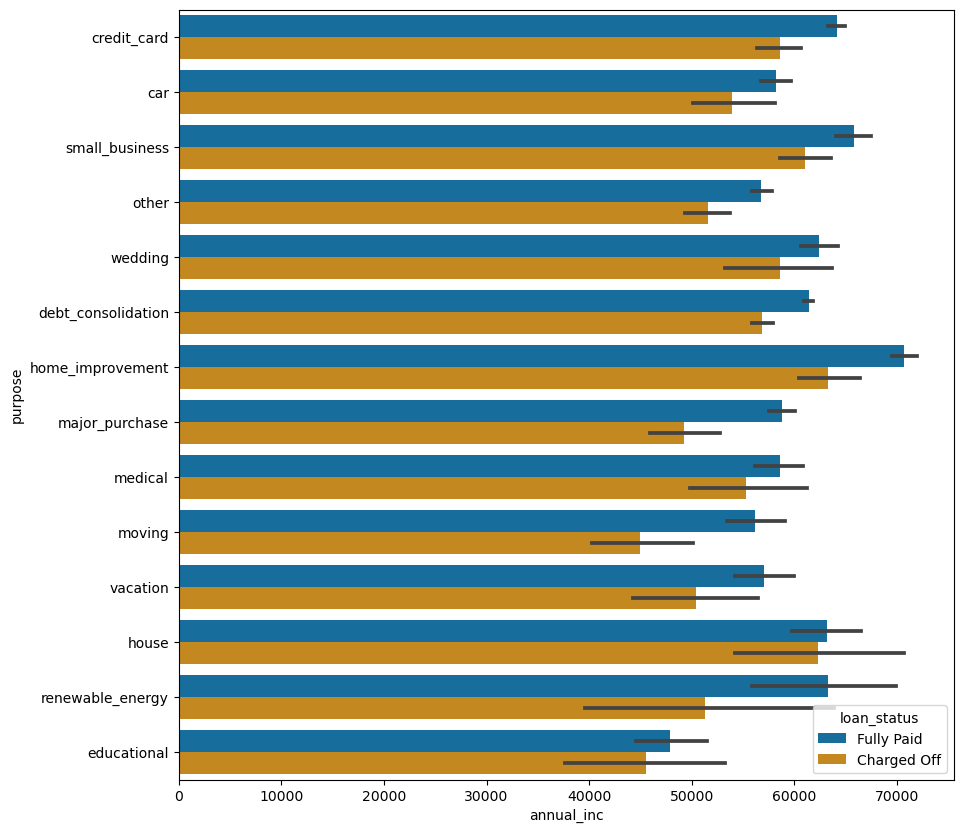

In [58]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='annual_inc', y='purpose', hue ='loan_status')
plt.show()

#Bivariate analysis

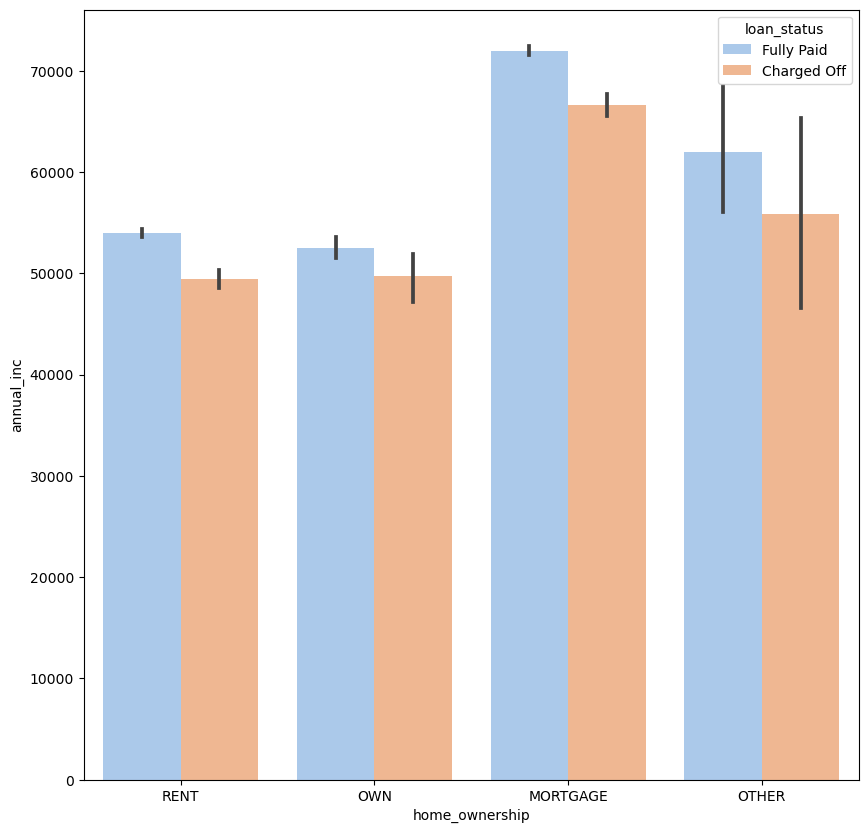

In [59]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

<Axes: xlabel='annual_inc_groups', ylabel='loan_amnt'>

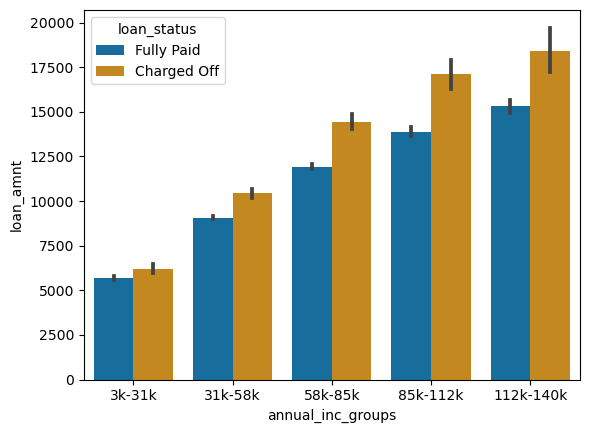

In [60]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan)

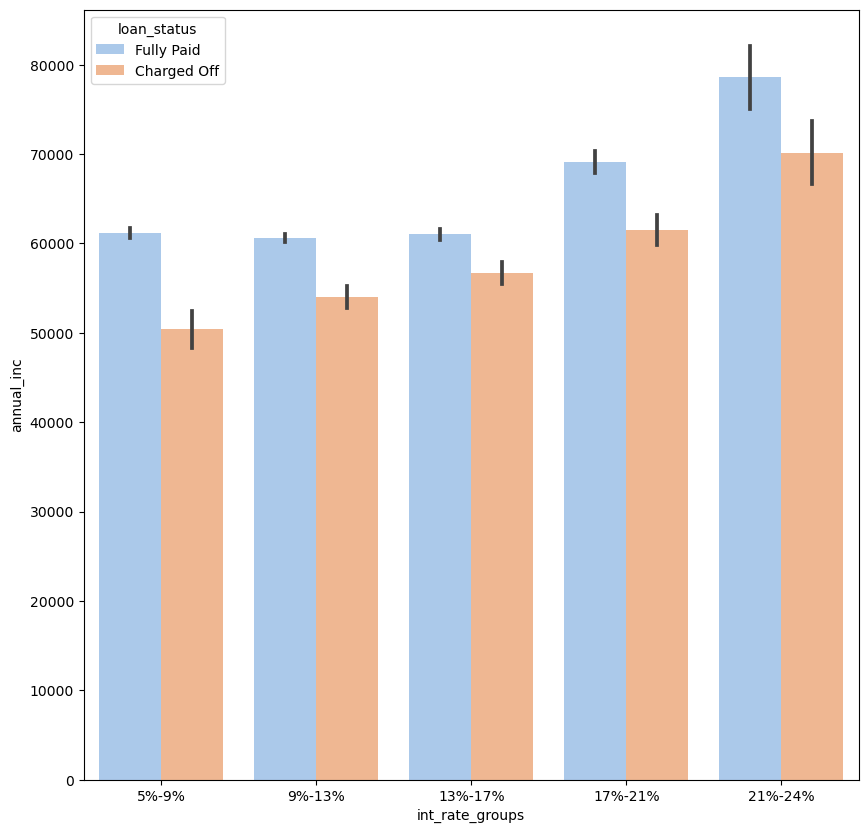

In [61]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

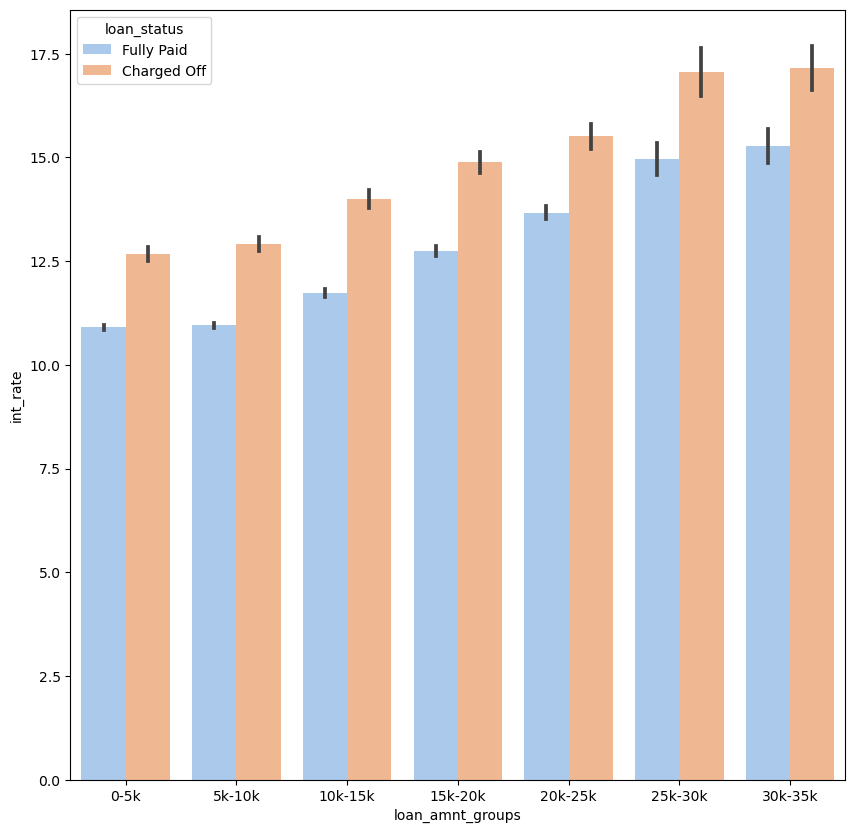

In [62]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

In [63]:
loan.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,dti,pub_rec_bankruptcies,int_rate_groups,annual_inc_groups,issue_month,issue_year,installment_groups,funded_amnt_inv_group,loan_amnt_groups,dti_groups
39711,5000,5000,700.0,36 months,8.70,158.30,B,1,5,MORTGAGE,...,15.55,NaN,5%-9%,58k-85k,Jul,2007,145-274,0-5k,0-5k,12-18
39712,2500,2500,1075.0,36 months,8.07,78.42,A,4,4,MORTGAGE,...,11.33,NaN,5%-9%,85k-112k,Jul,2007,14-145,0-5k,0-5k,6-12
39713,8500,8500,875.0,36 months,10.28,275.38,C,1,3,RENT,...,6.40,NaN,9%-13%,3k-31k,Jul,2007,274-403,0-5k,5k-10k,6-12
39714,5000,5000,1325.0,36 months,8.07,156.84,A,4,0,MORTGAGE,...,2.30,NaN,5%-9%,85k-112k,Jul,2007,145-274,0-5k,0-5k,0-6
39716,7500,7500,800.0,36 months,13.75,255.43,E,2,0,OWN,...,14.29,NaN,13%-17%,3k-31k,Jun,2007,145-274,0-5k,5k-10k,12-18


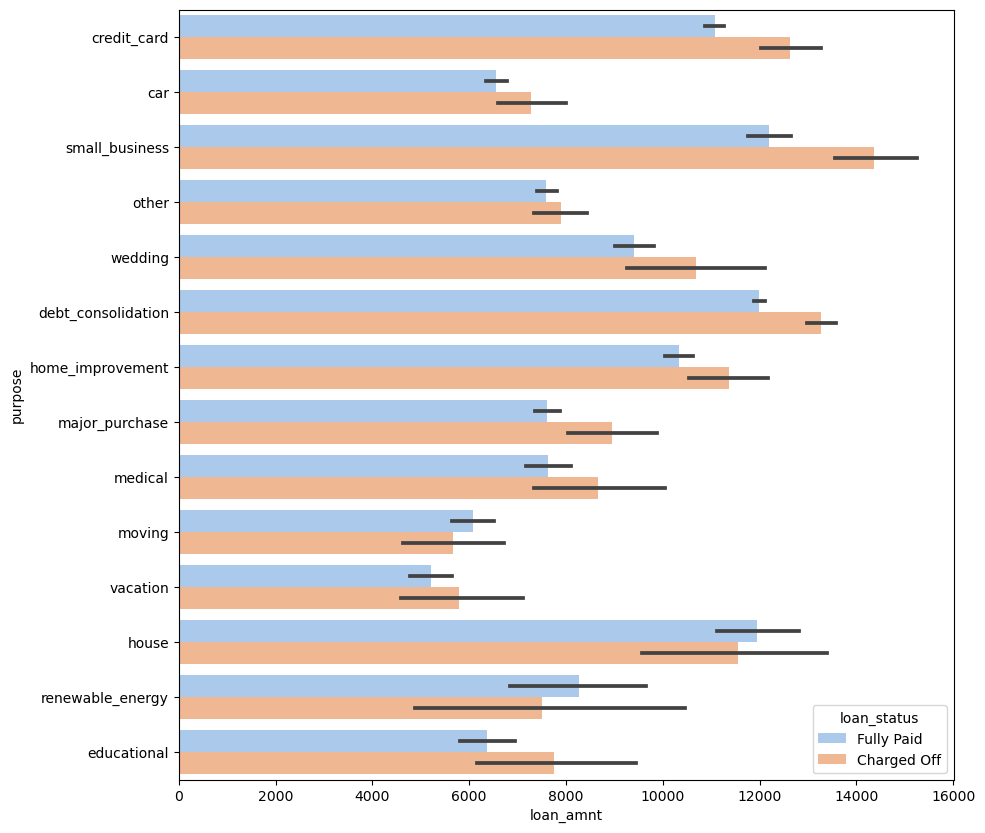

In [64]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

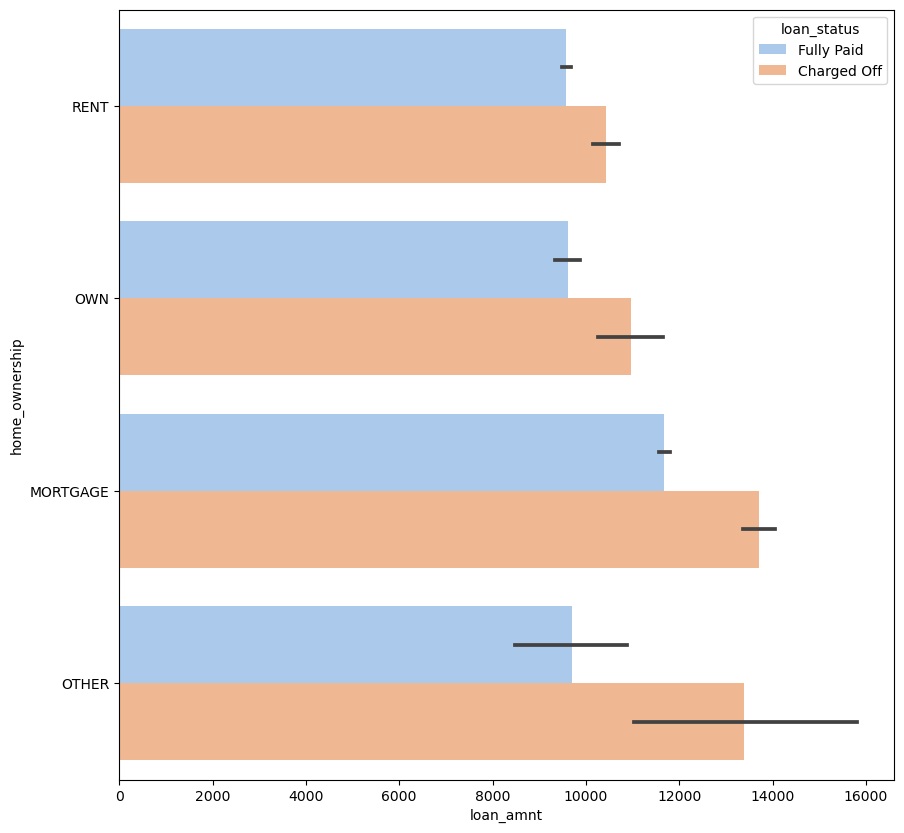

In [65]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

/var/folders/f2/__lf7f8j44zczml0p0z9xnwm0000gn/T/ipykernel_3270/618493835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['issue_month'] = pd.Categorical(loan['issue_month'],
/var/folders/f2/__lf7f8j44zczml0p0z9xnwm0000gn/T/ipykernel_3270/618493835.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['issue_year'] = pd.Categorical(loan['issue_year'], ordered=True)


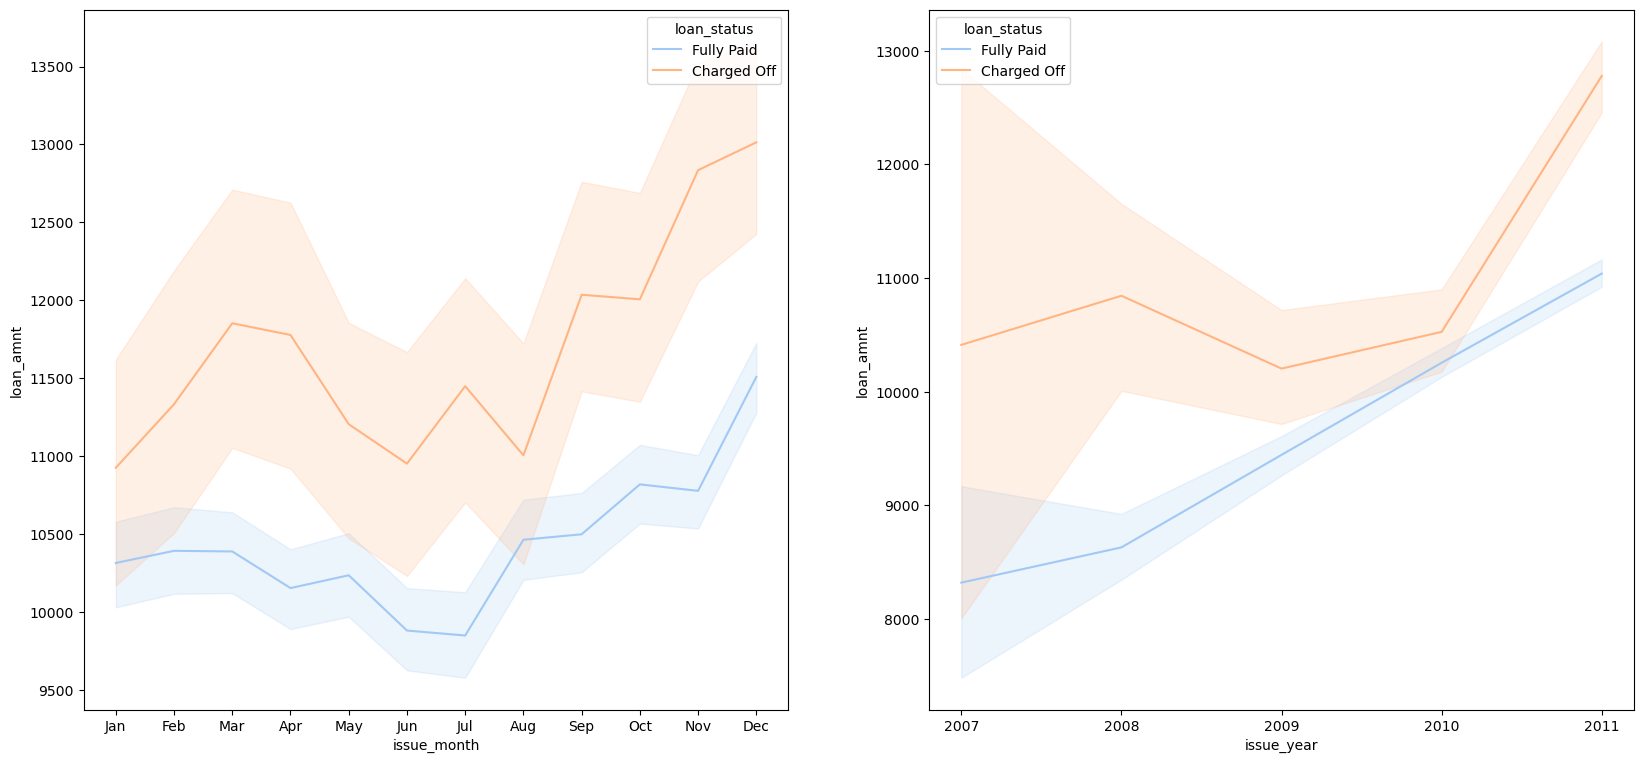

In [83]:
loan['issue_month'] = pd.Categorical(loan['issue_month'], 
                                     categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
                                     ordered=True)

# Convert 'issue_year' to a categorical or sort it numerically if needed
loan['issue_year'] = pd.Categorical(loan['issue_year'], ordered=True)

plt.figure(figsize=(20,20))

plt.subplot(221)
sns.lineplot(data=loan, y='loan_amnt', x='issue_month', hue='loan_status', palette="pastel")

plt.subplot(222)
sns.lineplot(data=loan, y='loan_amnt', x='issue_year', hue='loan_status', palette="pastel")

plt.show()

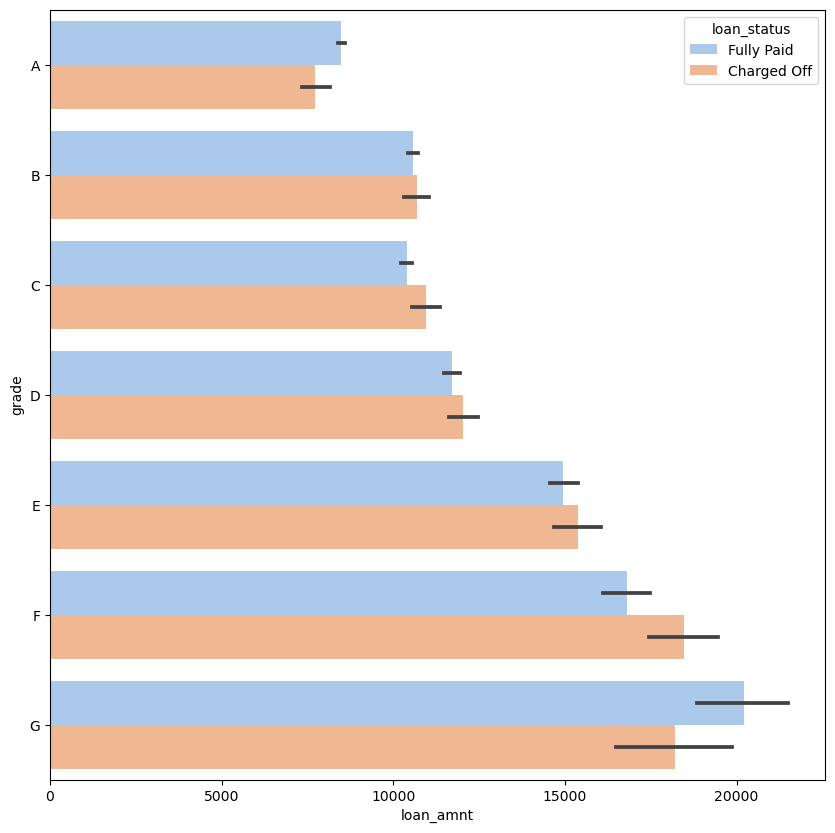

In [67]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

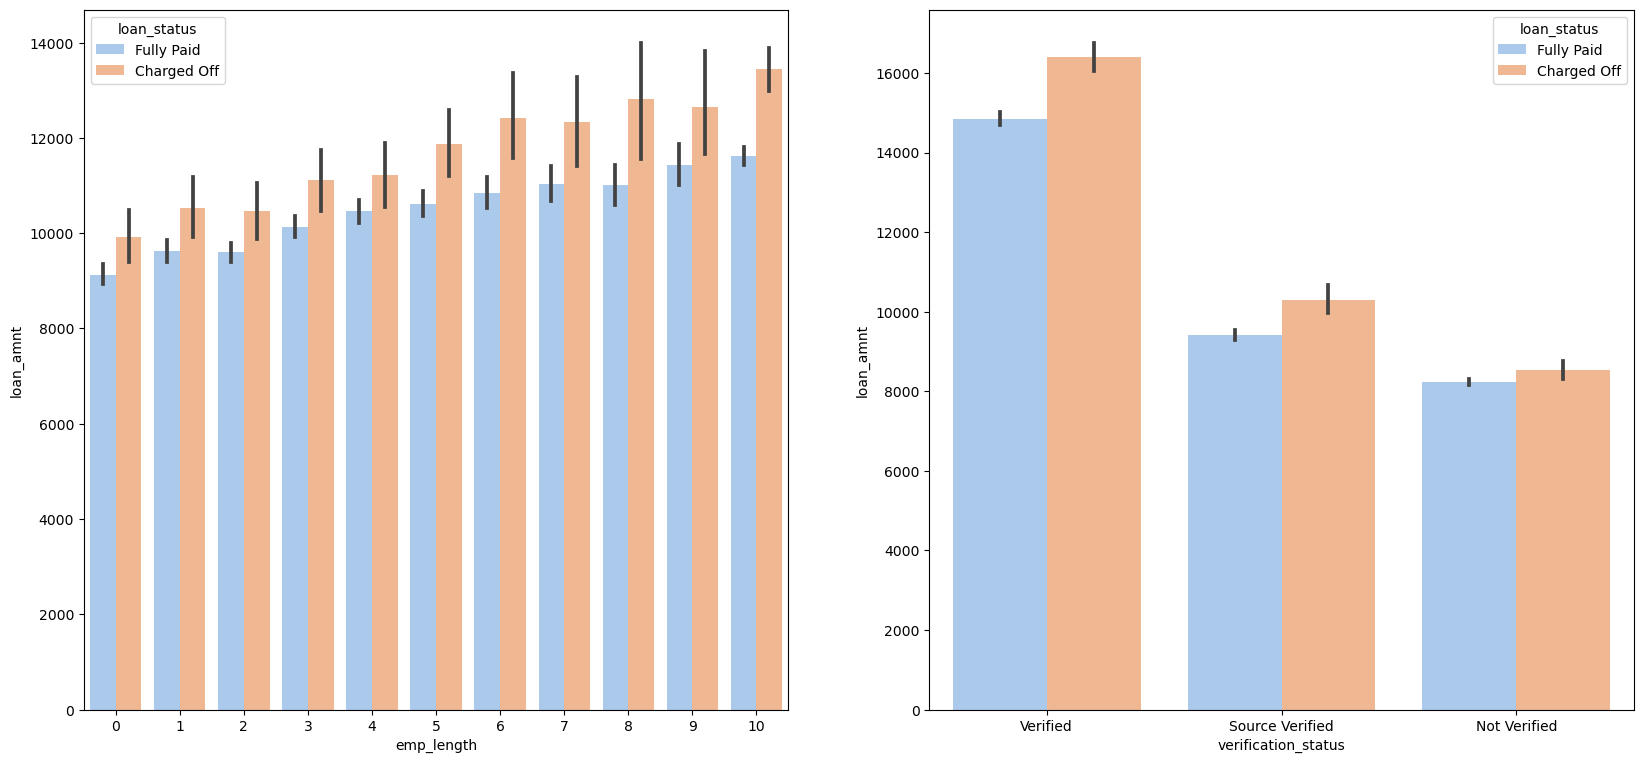

In [68]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =loan,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")


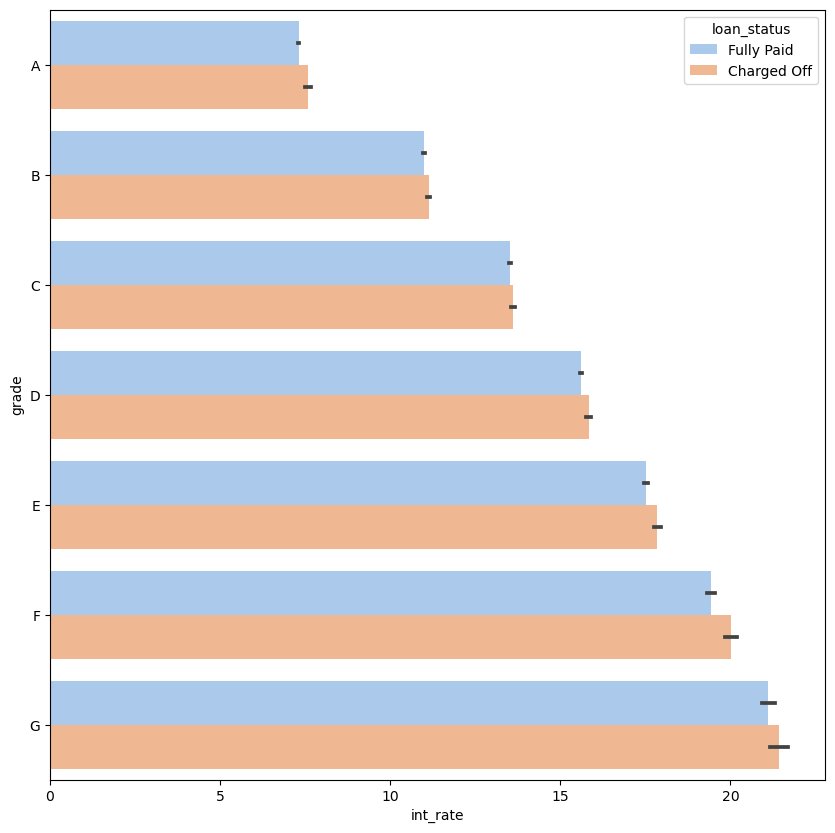

In [69]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

/Users/sasinandan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

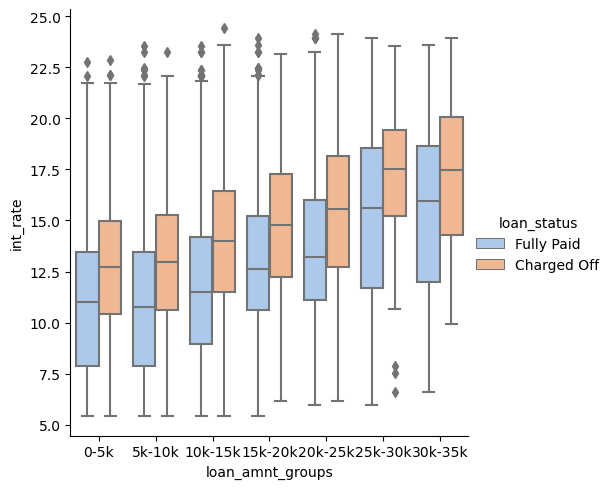

In [70]:
# fig,ax = plt.subplots(figsize = (15,6))
plt.tight_layout()
sns.catplot(data =loan,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')

/Users/sasinandan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


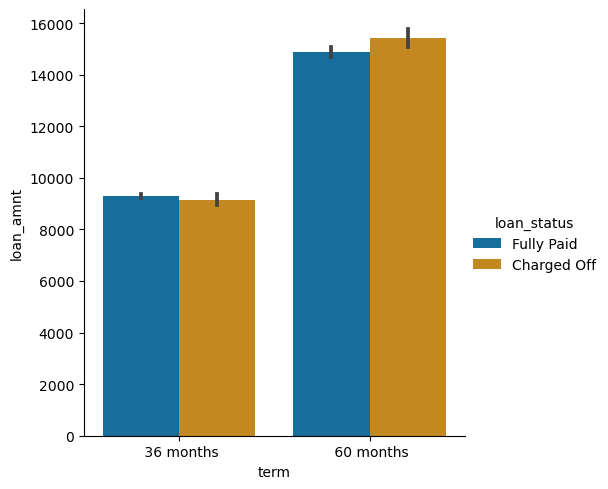

In [71]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan,hue = 'loan_status', kind = 'bar')

In [77]:
def plot_charged_off_percentage(df, column, stacked=False):
    """
    Calculate and plot the Charged Off percentage and the number of loans for a specified column.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column for which to calculate and plot Charged Off percentage.
        stacked (bool, optional): Whether to create a stacked bar plot (default: False).

    Returns:
        None
    """
    # Calculate Charged Off percentage
    charged_off_data = pd.crosstab(df[column], df['loan_status'], margins=True)
    charged_off_data['Total'] = charged_off_data['Charged Off'] + charged_off_data['Fully Paid']
    charged_off_data['Charged Off %'] = round((charged_off_data['Charged Off'] * 100 / charged_off_data['Total']), 2)
    # Remove the last row with sum total
    charged_off_data = charged_off_data[0:-1]

    # Plot
    fig, ax1 = plt.subplots(figsize=(20, 8))

    # Line plot for Charged Off Percentage
    charged_off_plot = charged_off_data[['Charged Off %']]
    line = charged_off_plot.plot(ax=ax1, marker='o', color='r', lw=2)
    line.set_title(column.title() + ' vs Charged Off %', fontsize=20, weight="bold")
    line.set_xlabel(column.title())
    line.set_ylabel('Charged Off %')

    # Bar plot for Number of Loans
    loans_plot = charged_off_data.iloc[:, 0:3]
    ax2 = loans_plot.plot(kind='bar', ax=ax1, rot=1, secondary_y=True, stacked=stacked)
    ax2.set_ylabel('Number of Loans')
    
    plt.show()


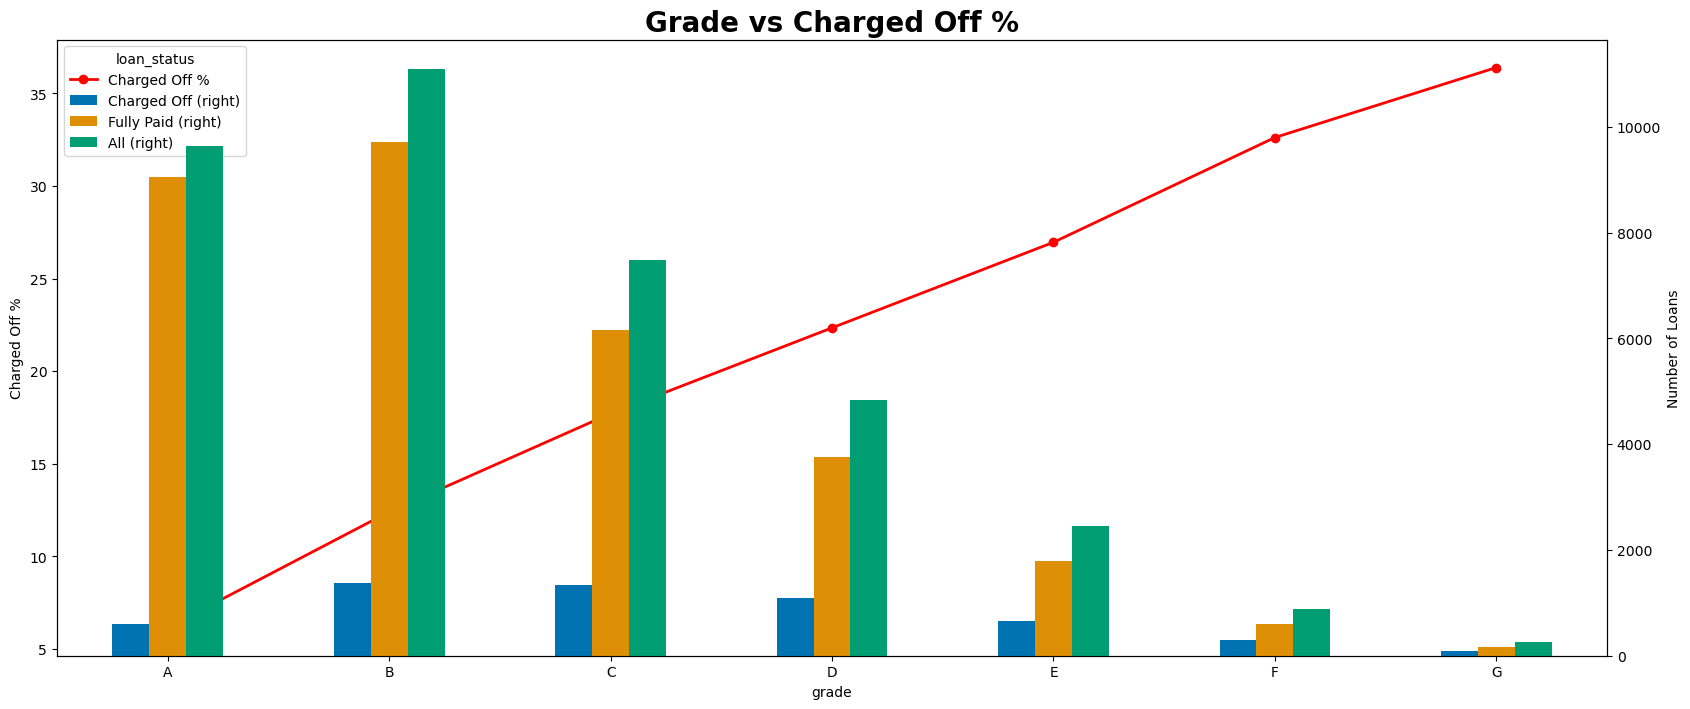

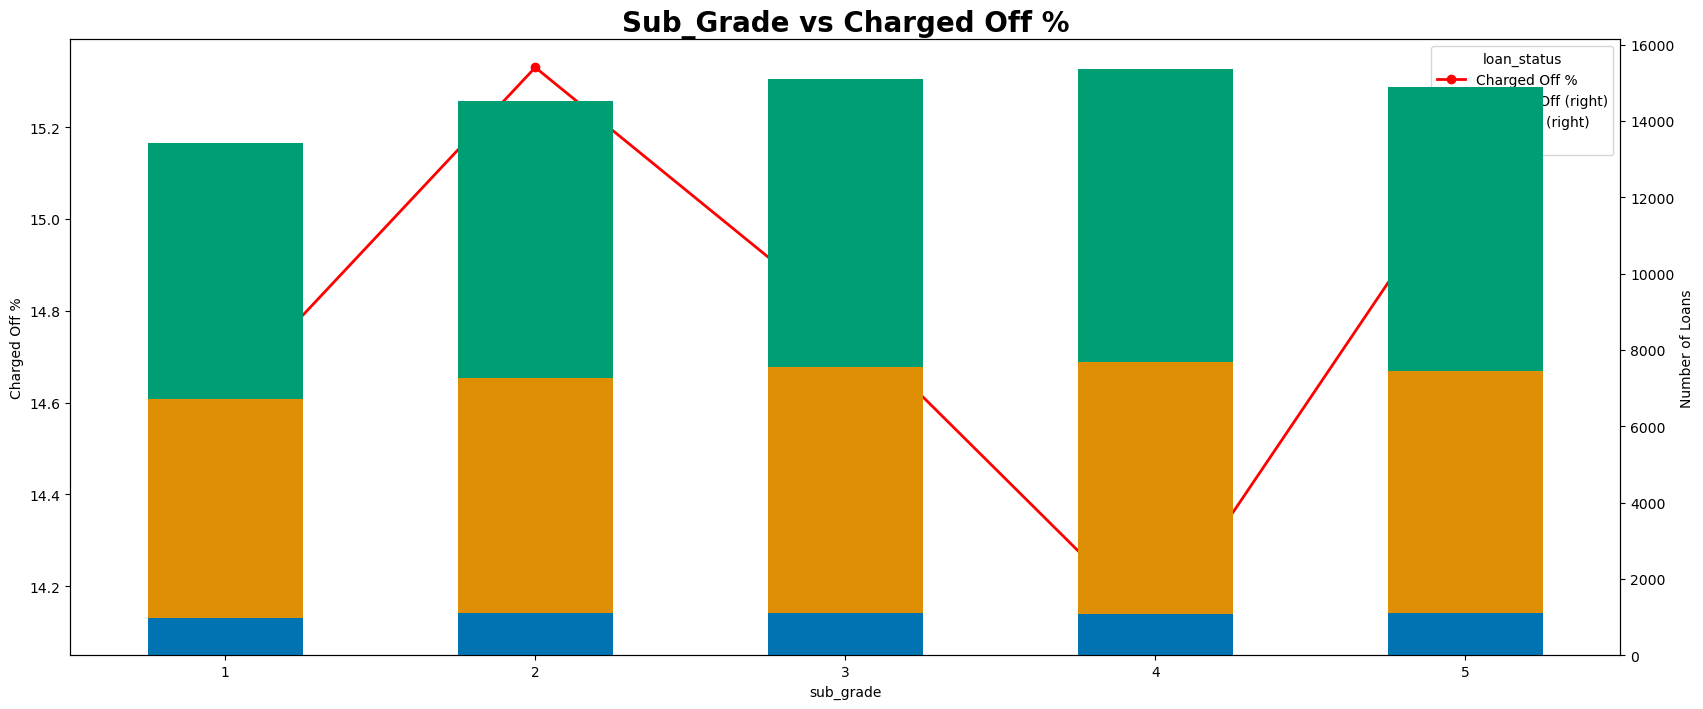

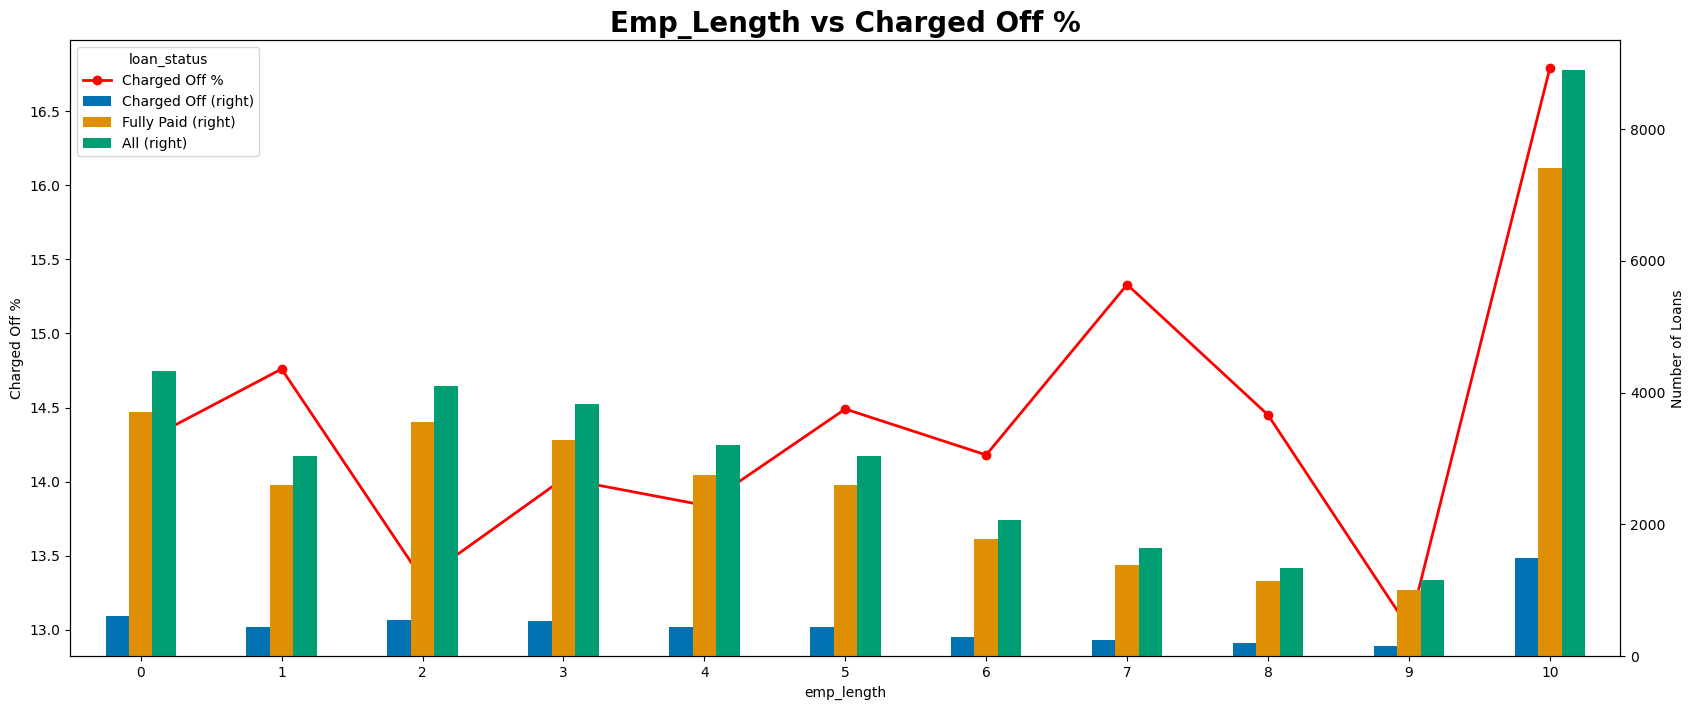

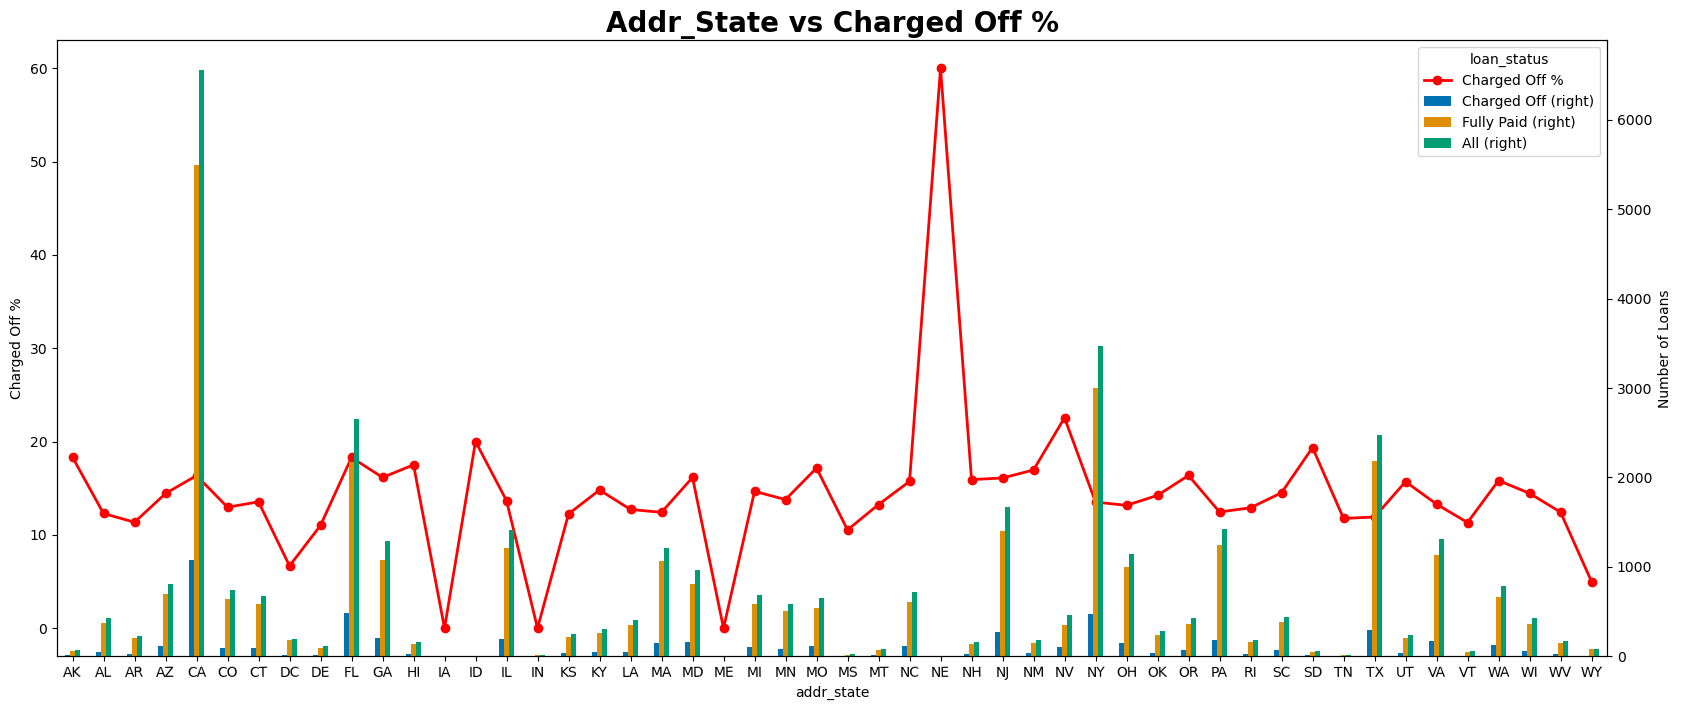

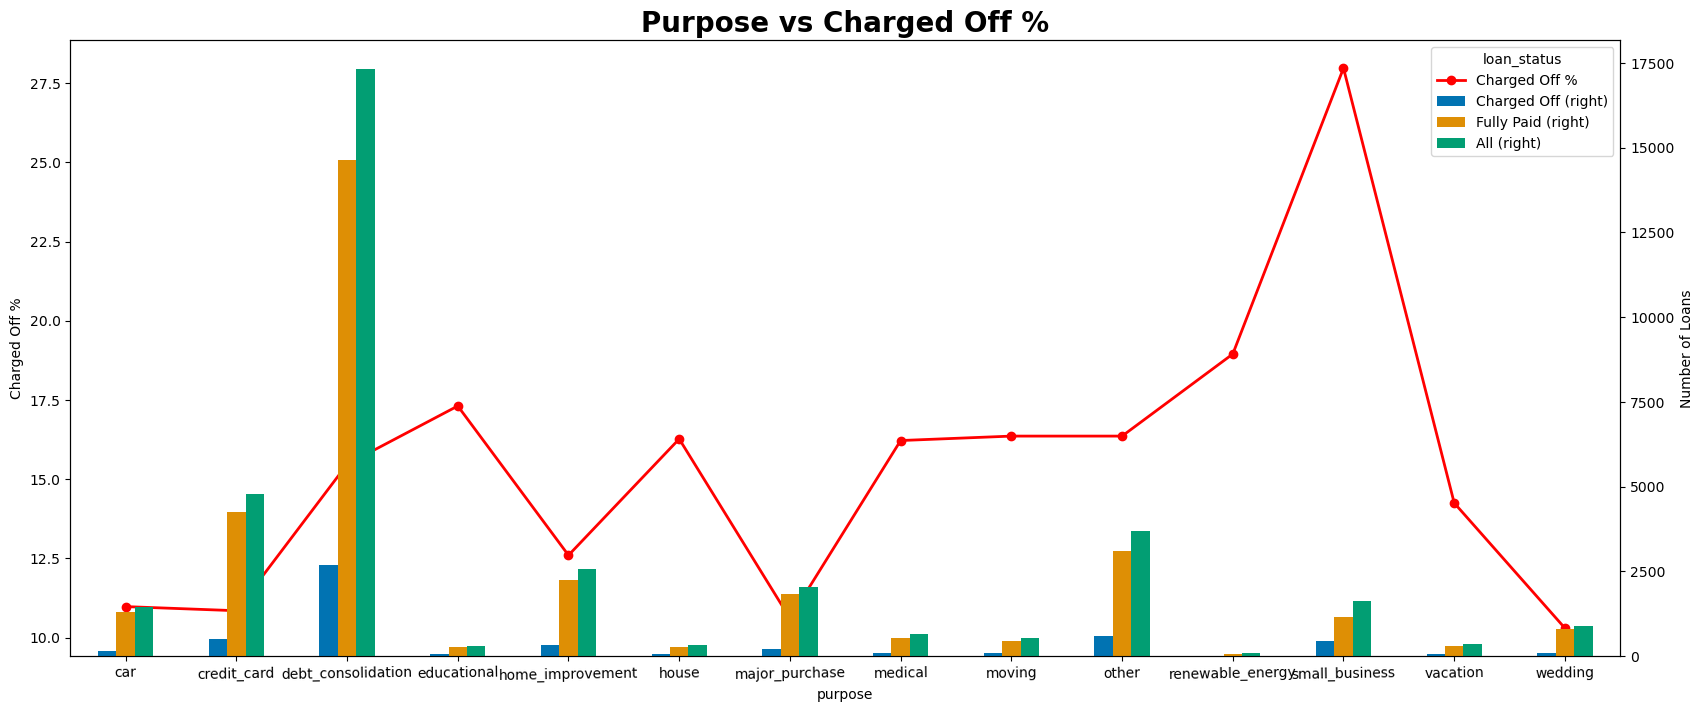

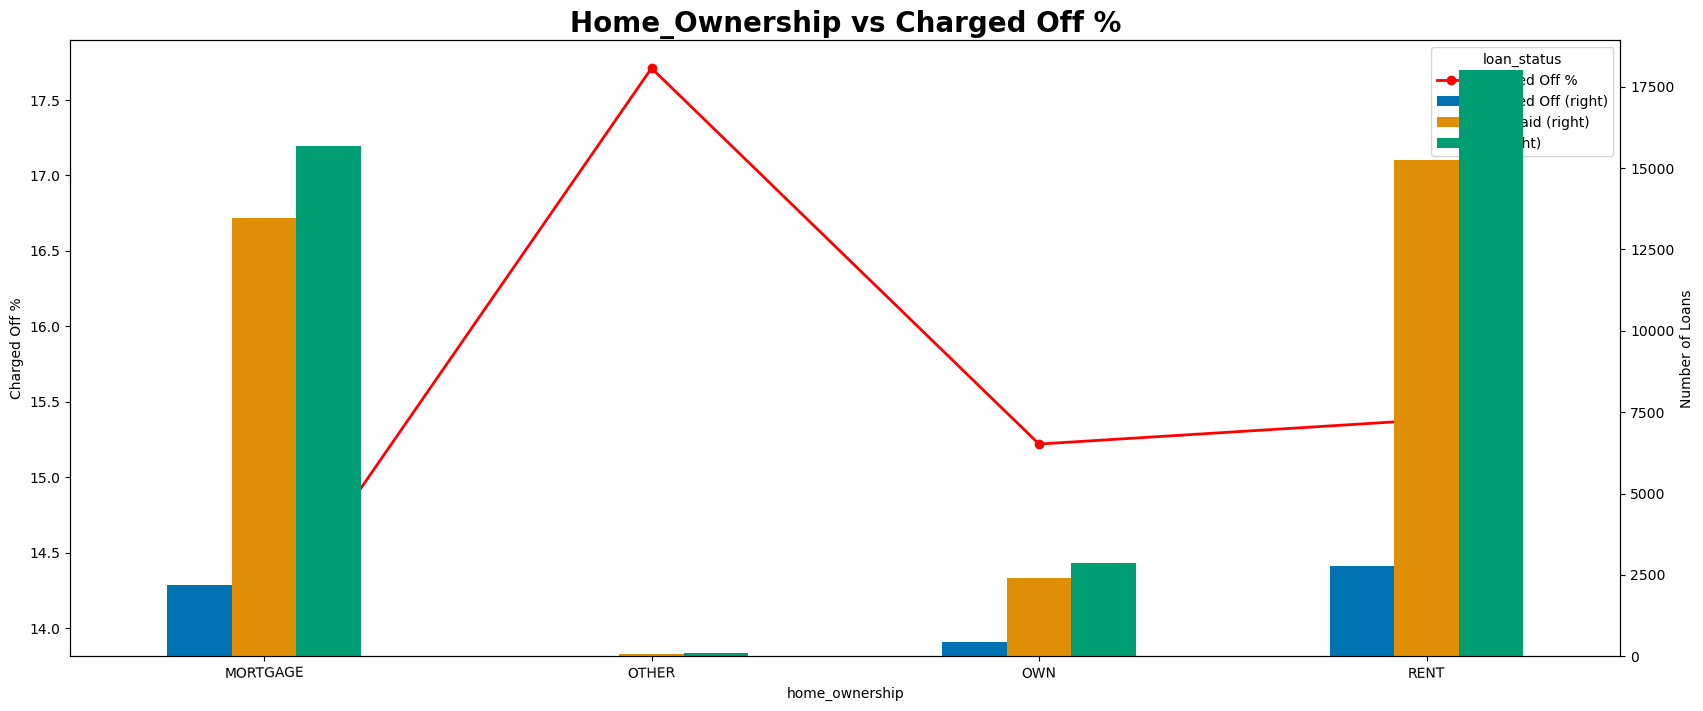

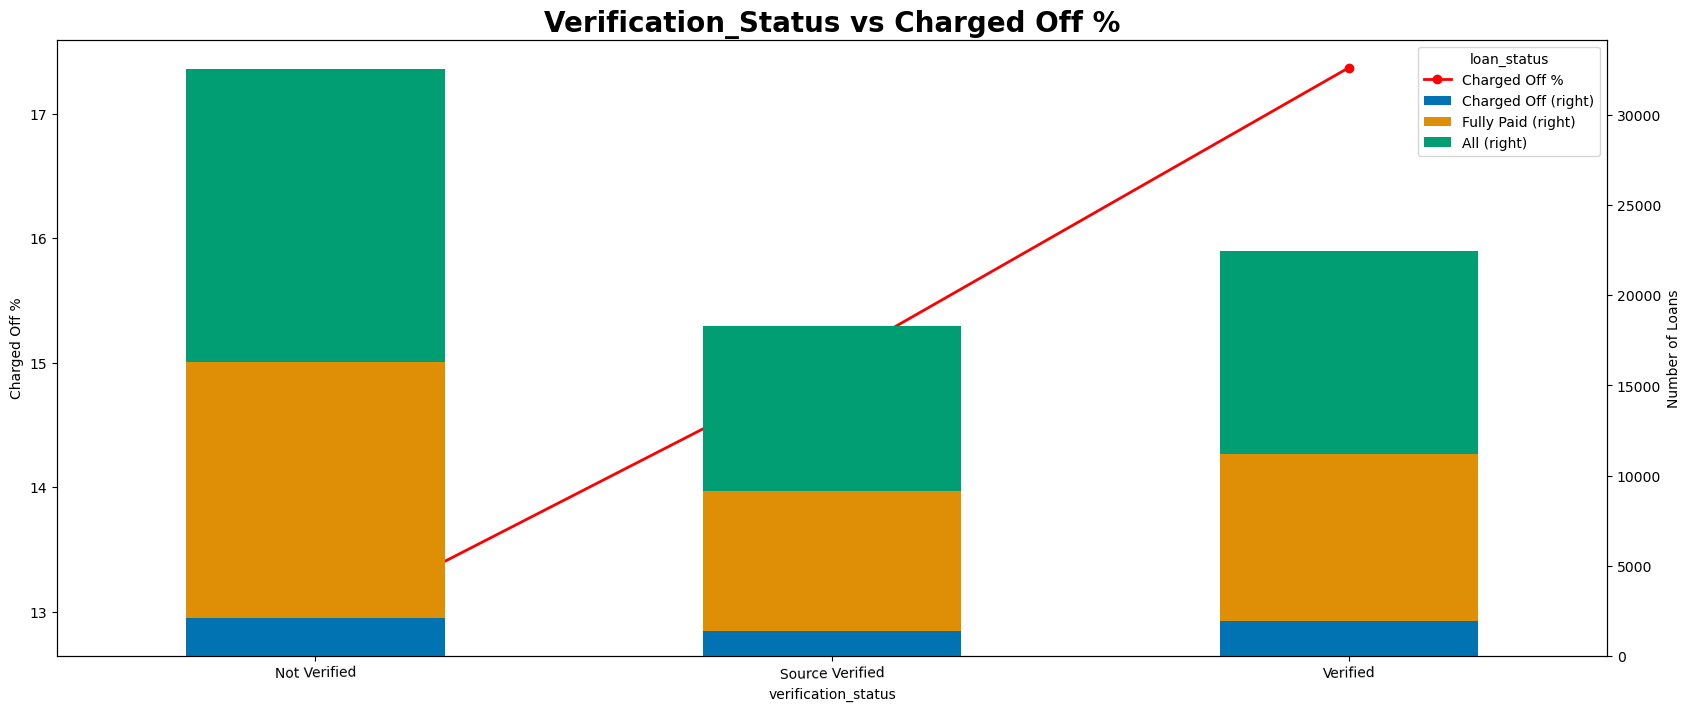

In [82]:
columns_config = {
    'grade': {},
    'sub_grade': {'stacked': True},
    'emp_length': {},
    'addr_state': {},
    'purpose': {},
    'home_ownership': {},
    'verification_status': {'stacked': True}
}

for column, plot_config in columns_config.items():
    stacked = plot_config.get('stacked', False)
    plot_charged_off_percentage(loan, column, stacked)
